## Regression model

#### Using OLS multiple linear regression model to find feature importance of topics to reviewer score

#### Import Libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import QuantileTransformer

## Importing topic probability distribution data and replacing minimum probability with 0

In [15]:
def using_where(df):
    return df.where(df.values != df.min(axis=1)[:,None])

In [16]:
data = pd.read_csv('review_df1.csv')
lda_positive = pd.read_csv('Test3000_positive.csv')
lda_positive = lda_positive[[col for col in lda_positive.columns if 'review_topic_' in col]]
lda_positive = using_where(lda_positive)
lda_positive = lda_positive.fillna(0)
lda_negative = pd.read_csv('Test3000_negative.csv')
lda_negative = lda_negative[[col for col in lda_negative.columns if 'review_topic_' in col]]
lda_negative = using_where(lda_negative)
lda_negative = lda_negative.fillna(0)

In [38]:
#data['Score_difference']= data.Reviewer_Score - data.Average_Score

## Combine data

In [17]:
combined = pd.concat([data, lda_positive, lda_negative], axis=1)
combined.tail()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,lat,lng,Country,City,p_review_topic_0,p_review_topic_1,p_review_topic_2,n_review_topic_0,n_review_topic_1,n_review_topic_2
3515,16 rue de Berri 8th arr 75008 Paris France,219,8/9/2016,8.2,H tel California Champs Elys es,United States of America,old,2,1332,it needs renovation,...,48.872633,2.304808,France,Paris,0.0,0.346405,0.000000,0.000000,0.000000,0.000000
3516,40 Liverpool Street City of London London EC2M...,346,4/17/2016,9.0,Andaz London Liverpool Street,Belgium,located next to railway station which is usin...,24,1283,lots of possibilities to eat and relax very n...,...,51.517283,-0.081245,United Kingdom,London,0.0,0.000000,0.345029,0.000000,0.346296,0.342593
3517,Via Morigi 2 Milan City Center 20123 Milan Italy,69,12/1/2015,7.4,Hotel Mentana,Romania,poor breakfast the furniture should be renova...,13,974,clean room and comfortable room the sheets we...,...,45.462297,9.181470,Italy,Milan,0.0,0.346979,0.343080,0.333333,0.369048,0.000000
3518,Plaza de Catalunya 19 Ciutat Vella 08002 Barce...,315,11/7/2016,9.3,Olivia Plaza Hotel,United Kingdom,nothing,2,2757,upgraded on arrival at no extra cost compleme...,...,41.386146,2.171159,Spain,Barcelona,0.0,0.307292,0.430556,0.000000,0.000000,0.000000
3519,2 Bd Garibaldi 15th arr 75015 Paris France,54,1/7/2016,8.3,First Hotel Paris Tour Eiffel,Australia,rooms are very small bed was uncomfy and stre...,16,275,location clean friendly and modern hotel,...,48.847511,2.302220,France,Paris,0.0,0.352201,0.333333,0.321839,0.390805,0.000000


In [18]:
combined.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
Country                                       False
City                                          False
p_review_top

In [309]:
combined_var.to_csv(r'C:\Users\lohro\Desktop\TEXT ANALYTICS\Project\Code\combined3000_1.csv', index = False)

In [75]:
combined_var = combined[[col for col in combined.columns if 'review_topic_' in col]]
combined_var = pd.concat([combined_var, data['Reviewer_Score']], axis=1)
combined_var.head()

,p_review_topic_0,p_review_topic_1,p_review_topic_2,n_review_topic_0,n_review_topic_1,n_review_topic_2,Reviewer_Score
0,0.000000,0.339506,0.337449,0.000000,0.352201,0.333333,8.8
1,0.371069,0.000000,0.000000,0.269360,0.000000,0.478114,6.3
2,0.351190,0.333333,0.000000,0.333333,0.339744,0.000000,9.6
3,0.351190,0.351190,0.000000,0.365079,0.000000,0.321429,9.6
4,0.339744,0.339744,0.000000,0.000000,0.327485,0.362573,3.3


## Check for multicollinearity

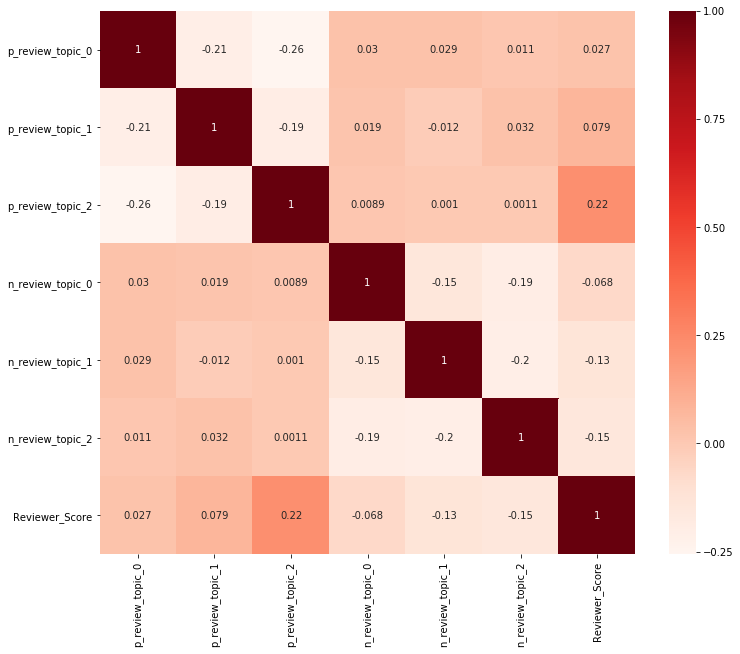

In [76]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = combined_var.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Perform multiple linear regression model

In [78]:
X = combined_var.drop("Reviewer_Score",1)   #Feature Matrix
y = combined_var["Reviewer_Score"]          #Target Variable


In [178]:
#Use for log regression and random forest
#lab_enc = preprocessing.LabelEncoder()
#y = lab_enc.fit_transform(y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [80]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
p_review_topic_0,1.220012
p_review_topic_1,1.331503
p_review_topic_2,2.728026
n_review_topic_0,-1.688717
n_review_topic_1,-2.234427
n_review_topic_2,-2.810009


In [82]:
y_pred = regressor.predict(X_test)

In [83]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
378,5.4,8.287469
1225,9.2,7.797910
575,6.7,7.522754
3394,10.0,8.215167
467,10.0,7.736690
45,9.2,8.252108
1815,6.0,6.823023
1118,5.8,8.380567
534,10.0,9.285883
861,10.0,9.794009


In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1856920332691967
Mean Squared Error: 2.3148481965563446
Root Mean Squared Error: 1.521462518945618


In [85]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()

print(result.rsquared, result.rsquared_adj)


0.15870976601004494 0.15727289114413556


Feature: 0, Score: 1.22001
Feature: 1, Score: 1.33150
Feature: 2, Score: 2.72803
Feature: 3, Score: -1.68872
Feature: 4, Score: -2.23443
Feature: 5, Score: -2.81001


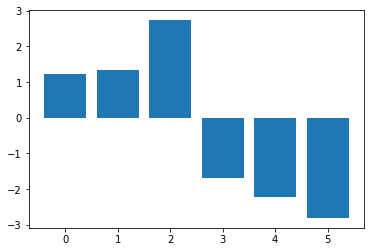

In [86]:
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Add sentiment score into the picture

In [60]:
sentiment_score = pd.read_csv('score_df1.csv')

In [61]:
combined_var = combined[[col for col in combined.columns if 'review_topic_' in col]]
combined_var = pd.concat([combined_var, sentiment_score], axis=1)
combined_var.head()

,p_review_topic_0,p_review_topic_1,p_review_topic_2,n_review_topic_0,n_review_topic_1,n_review_topic_2,positive_pct,negative_pct,reviewer_score
0,0.000000,0.339506,0.337449,0.000000,0.352201,0.333333,1.000000,0.000000,8.8
1,0.371069,0.000000,0.000000,0.269360,0.000000,0.478114,0.666667,0.333333,6.3
2,0.351190,0.333333,0.000000,0.333333,0.339744,0.000000,1.000000,0.000000,9.6
3,0.351190,0.351190,0.000000,0.365079,0.000000,0.321429,1.000000,0.000000,9.6
4,0.339744,0.339744,0.000000,0.000000,0.327485,0.362573,0.333333,0.666667,3.3


## Multiply sentiment percentage score to probability

In [63]:
combined_var['p_topic_0_weighted']= combined_var.p_review_topic_0 * combined_var.positive_pct
combined_var['p_topic_1_weighted']= combined_var.p_review_topic_1 * combined_var.positive_pct
combined_var['p_topic_2_weighted']= combined_var.p_review_topic_2 * combined_var.positive_pct
combined_var['n_topic_0_weighted']= combined_var.n_review_topic_0 * combined_var.negative_pct
combined_var['n_topic_1_weighted']= combined_var.n_review_topic_1 * combined_var.negative_pct
combined_var['n_topic_2_weighted']= combined_var.n_review_topic_2 * combined_var.negative_pct
combined_var.head()

,p_review_topic_0,p_review_topic_1,p_review_topic_2,n_review_topic_0,n_review_topic_1,n_review_topic_2,positive_pct,negative_pct,reviewer_score,p_topic_0_weighted,p_topic_1_weighted,p_topic_2_weighted,n_topic_0_weighted,n_topic_1_weighted,n_topic_2_weighted
0,0.000000,0.339506,0.337449,0.000000,0.352201,0.333333,1.000000,0.000000,8.8,0.000000,0.339506,0.337449,0.000000,0.000000,0.000000
1,0.371069,0.000000,0.000000,0.269360,0.000000,0.478114,0.666667,0.333333,6.3,0.247379,0.000000,0.000000,0.089787,0.000000,0.159371
2,0.351190,0.333333,0.000000,0.333333,0.339744,0.000000,1.000000,0.000000,9.6,0.351190,0.333333,0.000000,0.000000,0.000000,0.000000
3,0.351190,0.351190,0.000000,0.365079,0.000000,0.321429,1.000000,0.000000,9.6,0.351190,0.351190,0.000000,0.000000,0.000000,0.000000
4,0.339744,0.339744,0.000000,0.000000,0.327485,0.362573,0.333333,0.666667,3.3,0.113248,0.113248,0.000000,0.000000,0.218324,0.241715


In [64]:
combined_var_wt = combined_var[[col for col in combined_var.columns if '_weighted' in col]]
combined_var_wt = pd.concat([combined_var_wt, sentiment_score['reviewer_score']], axis=1)
combined_var_wt.head()

,p_topic_0_weighted,p_topic_1_weighted,p_topic_2_weighted,n_topic_0_weighted,n_topic_1_weighted,n_topic_2_weighted,reviewer_score
0,0.000000,0.339506,0.337449,0.000000,0.000000,0.000000,8.8
1,0.247379,0.000000,0.000000,0.089787,0.000000,0.159371,6.3
2,0.351190,0.333333,0.000000,0.000000,0.000000,0.000000,9.6
3,0.351190,0.351190,0.000000,0.000000,0.000000,0.000000,9.6
4,0.113248,0.113248,0.000000,0.000000,0.218324,0.241715,3.3


## Check for multicollinearity

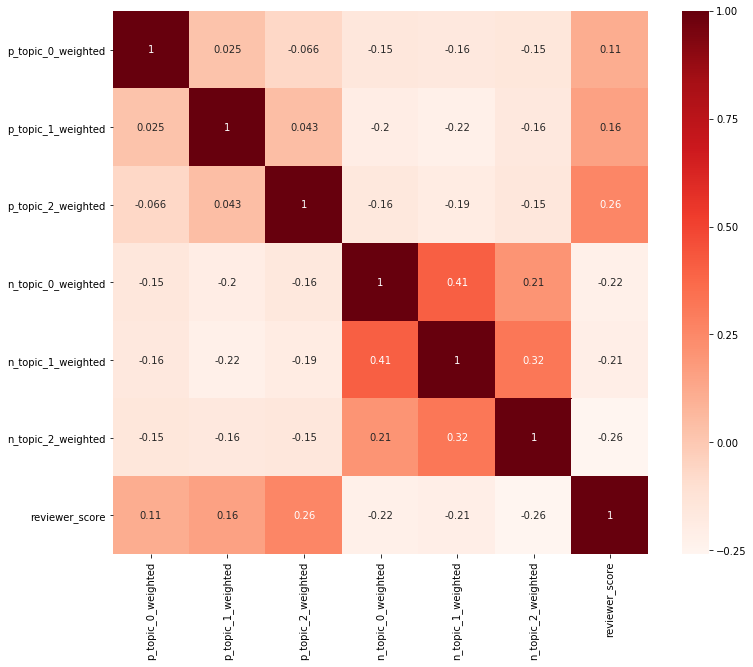

In [65]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = combined_var_wt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Perform multiple linear regression model

In [66]:
X = combined_var_wt.drop("reviewer_score",1)   #Feature Matrix
y = combined_var_wt["reviewer_score"]          #Target Variable

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [68]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
p_topic_0_weighted,0.511869
p_topic_1_weighted,0.564333
p_topic_2_weighted,1.740628
n_topic_0_weighted,-2.437428
n_topic_1_weighted,-1.833281
n_topic_2_weighted,-3.973183


In [70]:
y_pred = regressor.predict(X_test)

In [71]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
378,5.4,8.262781
1225,9.2,8.080761
575,6.7,8.459765
3394,10.0,7.848649
467,10.0,8.726654
45,9.2,8.896121
1815,6.0,5.860721
1118,5.8,8.080761
534,10.0,8.398815
861,10.0,8.893758


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2077001419640492
Mean Squared Error: 2.31308223658386
Root Mean Squared Error: 1.5208820587356076


In [73]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)
# 0.877643371323 0.863248473832

0.15364196647499673 0.1521964361017687


Feature: 0, Score: 0.51187
Feature: 1, Score: 0.56433
Feature: 2, Score: 1.74063
Feature: 3, Score: -2.43743
Feature: 4, Score: -1.83328
Feature: 5, Score: -3.97318


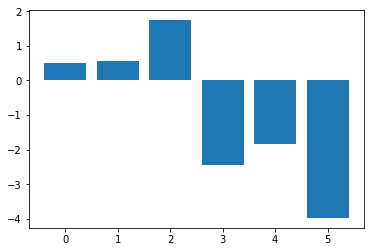

In [74]:
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()